In [100]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

## Task 1-1 data 불러오기

In [4]:
data = pd.read_csv('./p01_input.csv',encoding='cp949')
data.head()

,ID,최종가중치,학교ID,도시규모,도시규모별분석용,학년도,광역시도,시도별,학교급별,학교명,...,키,몸무게,혈당식전mgdl,총콜레스테롤mgdl,ASTUL,ALTUL,혈색소gdl,간염검사,수축기,이완기
0,Aa011남10101,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,125.8,27.3,NaN,NaN,NaN,NaN,NaN,NaN,77.0,58.0
1,Aa011남10102,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,124.3,25.4,NaN,NaN,NaN,NaN,NaN,NaN,83.0,51.0
2,Aa011남10103,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,119.2,23.5,NaN,NaN,NaN,NaN,NaN,NaN,103.0,65.0
3,Aa011남10104,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,115.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,92.0,66.0
4,Aa011남10105,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,120.0,33.5,NaN,NaN,NaN,NaN,NaN,NaN,102.0,59.0


## Task 1-2 데이터 중에서 키와 몸무게 데이터만 골라내기

In [6]:
student_data = data.loc[:,['키','몸무게']]
student_data.head()

,키,몸무게
0,125.8,27.3
1,124.3,25.4
2,119.2,23.5
3,115.0,20.0
4,120.0,33.5


## Task 2 학생들의 평균 키와 평균 몸무게 구하기

In [7]:
student_data.mean()

키      154.564444
몸무게     50.207591
dtype: float64

In [43]:
student_data.isna().sum()

키      0
몸무게    4
dtype: int64

In [45]:
# 몸무게에 Null 값이 있기 때문에 Null 값 있는 데이터 제거
student_data = student_data.dropna(how='any')

In [77]:
student_data.isna().sum()

키      0
몸무게    0
dtype: int64

## Task 3 키와 몸무게 사이의 상관관계 (피어슨 상관계수) 구하기

In [46]:
student_data.corr(method='pearson')

,키,몸무게
키,1.000000,0.849006
몸무게,0.849006,1.000000


## Task 4 Linear Regression을 사용하여 키와 몸무게 사이의 선형 관계를 찾기 (y = wx + b 에서 w와 b값 찾기)

In [47]:
# tensor변환
height = torch.FloatTensor(student_data['키'])
weight = torch.FloatTensor(student_data['몸무게'])

In [48]:
# shape 변환
height = torch.reshape(height,(-1,1))
weight = torch.reshape(weight,(-1,1))

In [49]:
# shape 확인
height.shape, weight.shape

(torch.Size([9682, 1]), torch.Size([9682, 1]))

## Task 4-1 가설, 비용 설정하기

In [79]:
W = torch.zeros(1,1)
b = torch.zeros(1,1)

hypothesis = torch.mm(height, W) + b

cost = torch.mean((hypothesis - weight)**2)

In [83]:
height * W +b

tensor([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]])

In [80]:
hypothesis

tensor([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]])

## Task 4-2 경사하강법으로 비용을 최소로 만들도록 학습하기

In [90]:
lr = 0.01
W = torch.zeros(1,1)
b = torch.zeros(1,1)

    
for epoch in range(1001):
    W.requires_grad_(True)
    b.requires_grad_(True)

    hypothesis = torch.mm(height, W) + b

    cost = torch.mean((hypothesis - weight)**2)
    
    cost.backward()
    
    with torch.no_grad():
        W = W - lr*W.grad
        b = b - lr*b.grad
        
    if epoch % 10 == 0:
        print("epoch : {}, cost : {}, W : {}, b : {}".format(epoch,cost,W,b))

epoch : 0, cost : 2812.3603515625, W : tensor([[160.1270]]), b : tensor([[1.0042]])
epoch : 10, cost : inf, W : tensor([[1.0947e+29]]), b : tensor([[6.9983e+26]])
epoch : 20, cost : nan, W : tensor([[nan]]), b : tensor([[nan]])
epoch : 30, cost : nan, W : tensor([[nan]]), b : tensor([[nan]])
epoch : 40, cost : nan, W : tensor([[nan]]), b : tensor([[nan]])
epoch : 50, cost : nan, W : tensor([[nan]]), b : tensor([[nan]])
epoch : 60, cost : nan, W : tensor([[nan]]), b : tensor([[nan]])
epoch : 70, cost : nan, W : tensor([[nan]]), b : tensor([[nan]])
epoch : 80, cost : nan, W : tensor([[nan]]), b : tensor([[nan]])
epoch : 90, cost : nan, W : tensor([[nan]]), b : tensor([[nan]])
epoch : 100, cost : nan, W : tensor([[nan]]), b : tensor([[nan]])
epoch : 110, cost : nan, W : tensor([[nan]]), b : tensor([[nan]])
epoch : 120, cost : nan, W : tensor([[nan]]), b : tensor([[nan]])
epoch : 130, cost : nan, W : tensor([[nan]]), b : tensor([[nan]])
epoch : 140, cost : nan, W : tensor([[nan]]), b : ten

### 학습이 안되기 때문에 키의 값을 m단위로 변환해서 작업

In [112]:
height = torch.FloatTensor(student_data['키']/100)
weight = torch.FloatTensor(student_data['몸무게'])

height = torch.reshape(height,(-1,1))
weight = torch.reshape(weight,(-1,1))

height

tensor([[1.2580],
        [1.2430],
        [1.1920],
        ...,
        [1.6950],
        [1.5920],
        [1.6200]])

In [97]:
lr = 0.1
W = torch.zeros(1,1)
b = torch.zeros(1,1)

    
for epoch in range(3001):
    W.requires_grad_(True)
    b.requires_grad_(True)

    hypothesis = torch.mm(height, W) + b

    cost = torch.mean((hypothesis - weight)**2)
    
    cost.backward()
    
    with torch.no_grad():
        W = W - lr*W.grad
        b = b - lr*b.grad
        
    if epoch % 100 == 0:
        print("epoch : {}, cost : {}, W : {}, b : {}".format(epoch,cost,W,b))

epoch : 0, cost : 2812.3603515625, W : tensor([[16.0127]]), b : tensor([[10.0415]])
epoch : 100, cost : 161.0576629638672, W : tensor([[33.0777]]), b : tensor([[-0.2297]])
epoch : 200, cost : 138.2012939453125, W : tensor([[41.2209]]), b : tensor([[-12.9234]])
epoch : 300, cost : 121.90314483642578, W : tensor([[48.0973]]), b : tensor([[-23.6425]])
epoch : 400, cost : 110.28142547607422, W : tensor([[53.9040]]), b : tensor([[-32.6940]])
epoch : 500, cost : 101.99437713623047, W : tensor([[58.8073]]), b : tensor([[-40.3374]])
epoch : 600, cost : 96.08512878417969, W : tensor([[62.9479]]), b : tensor([[-46.7917]])
epoch : 700, cost : 91.87145233154297, W : tensor([[66.4443]]), b : tensor([[-52.2420]])
epoch : 800, cost : 88.86680603027344, W : tensor([[69.3968]]), b : tensor([[-56.8444]])
epoch : 900, cost : 86.72431182861328, W : tensor([[71.8899]]), b : tensor([[-60.7308]])
epoch : 1000, cost : 85.19654846191406, W : tensor([[73.9953]]), b : tensor([[-64.0126]])
epoch : 1100, cost : 84

## Task 5 Matplotlib을 사용하여 좌표평면상에 입력값 과 구한 직선을 그려보기

## Task 5-1 입력값을 산포도로 그리기 (x축은 키, y축은 몸무게)

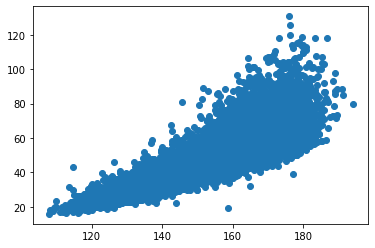

In [102]:
plt.scatter(student_data['키'],student_data['몸무게'])

## Task 5-2 w와 b값을 이용하여 직선 그리기 

In [109]:
# 최소 키값보다 작은 키값 입력 이때 키의 기준을 m로 바꿧음을 유의 
# 최대키보다 큰 값을 입력 
x_test = torch.FloatTensor([[1.],[2.]])

In [110]:
# Weight와 bias를 활용 result결과 추출 
test_result = torch.mm(x_test,W)+b

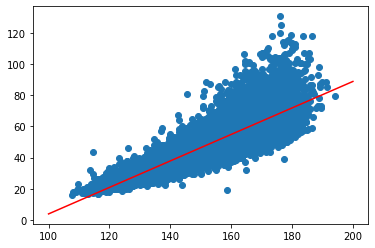

In [111]:
# Line 그래프로 그리면 두점을 잇는 직선을 그림 -> 우리가 추정한 직선의 방정식 
# 이때 색은 red로 지정하며 눈에 잘 보이도록 함.
plt.scatter(student_data['키'],student_data['몸무게'])
plt.plot(x_test*100,test_result,color='red')